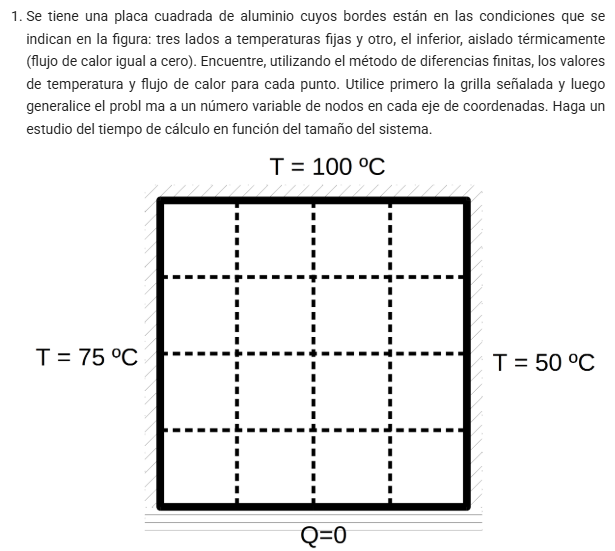

Consultas como se hace en clase

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [30]:
def temp_chapa(cond_contor,Nx,Ny,typ_cond_contorno):
    beta = Nx/Ny
    b = np.zeros((Nx,Ny))

    if typ_cond_contorno['A'] == 'temp' and typ_cond_contorno['D'] == 'flu':
        b[0,0] = cond_contor['A']
    elif typ_cond_contorno['A'] == 'flu' and typ_cond_contorno['D'] == 'temp':
        b[0,0] = cond_contor['D']
    elif typ_cond_contorno['A'] == 'temp' and typ_cond_contorno['D'] == 'temp':
        b[0,0] = (cond_contor['A'] + cond_contor['D'])/2

    b[0,1:Nx-1] = cond_contor['A'] 

    if typ_cond_contorno['A'] == 'temp' and typ_cond_contorno['B'] == 'flu':
        b[0,Nx-1] = cond_contor['A']
    elif typ_cond_contorno['A'] == 'flu' and typ_cond_contorno['B'] == 'temp':
        b[0,Nx-1] = cond_contor['B']
    elif typ_cond_contorno['A'] == 'temp' and typ_cond_contorno['B'] == 'temp':
        b[0,Nx-1] = (cond_contor['A'] + cond_contor['B'])/2


    b[1:Ny-1,-1] = cond_contor['B']

    if typ_cond_contorno['B'] == 'temp' and typ_cond_contorno['C'] == 'flu':
        b[-1,-1] = cond_contor['B']
    elif typ_cond_contorno['B'] == 'flu' and typ_cond_contorno['C'] == 'temp':
        b[-1,-1] = cond_contor['C']
    elif typ_cond_contorno['B'] == 'temp' and typ_cond_contorno['C'] == 'temp':
        b[-1,-1] = (cond_contor['B'] + cond_contor['C'])/2

    b[-1,1:Nx-1] = cond_contor['C']

    if typ_cond_contorno['C'] == 'temp' and typ_cond_contorno['D'] == 'flu':
        b[-1,0] = cond_contor['C']
    elif typ_cond_contorno['C'] == 'flu' and typ_cond_contorno['D'] == 'temp':
        b[-1,0] = cond_contor['D']
    elif typ_cond_contorno['C'] == 'temp' and typ_cond_contorno['D'] == 'temp':
        b[-1,0] = (cond_contor['C'] + cond_contor['D'])/2

    b[1:Ny-1,0] = cond_contor['D']

    b = b.flatten()

    filas_internas = np.arange(1, Ny-1)
    columnas_internas = np.arange(1,Nx-1)

    indices_filas_int, indices_columnas_int = np.meshgrid(filas_internas,columnas_internas,indexing='ij')

    flat_indices = np.ravel_multi_index((indices_filas_int.flatten(),indices_columnas_int.flatten()),(Nx,Ny))

    A = np.eye(Nx*Ny)

    A [flat_indices,flat_indices]= - 2 * ( 1 + beta**2 )
    A [flat_indices,flat_indices-1]= 1
    A [flat_indices,flat_indices+1]= 1

    A [flat_indices,flat_indices-Nx]= beta**2
    A [flat_indices,flat_indices+Nx]= beta**2


    T = np.linalg.solve(A,b)

    return b,A,T


In [41]:
import time as ti

In [44]:
cond_contor = {'A':100,'B':50,'C':0,'D':75}
typ_cond_contorno = {'A':'temp','B':'temp','C':'temp','D':'temp'}

Nx = 100
Ny = 100

t1 = ti.time()

b,A,T = temp_chapa(cond_contor,Nx,Ny,typ_cond_contorno)

t2 = ti.time()

print(t2-t1)

#plt.matshow(T.reshape(Nx,Ny))

127.83124160766602


Text(0, 0.5, 'j')

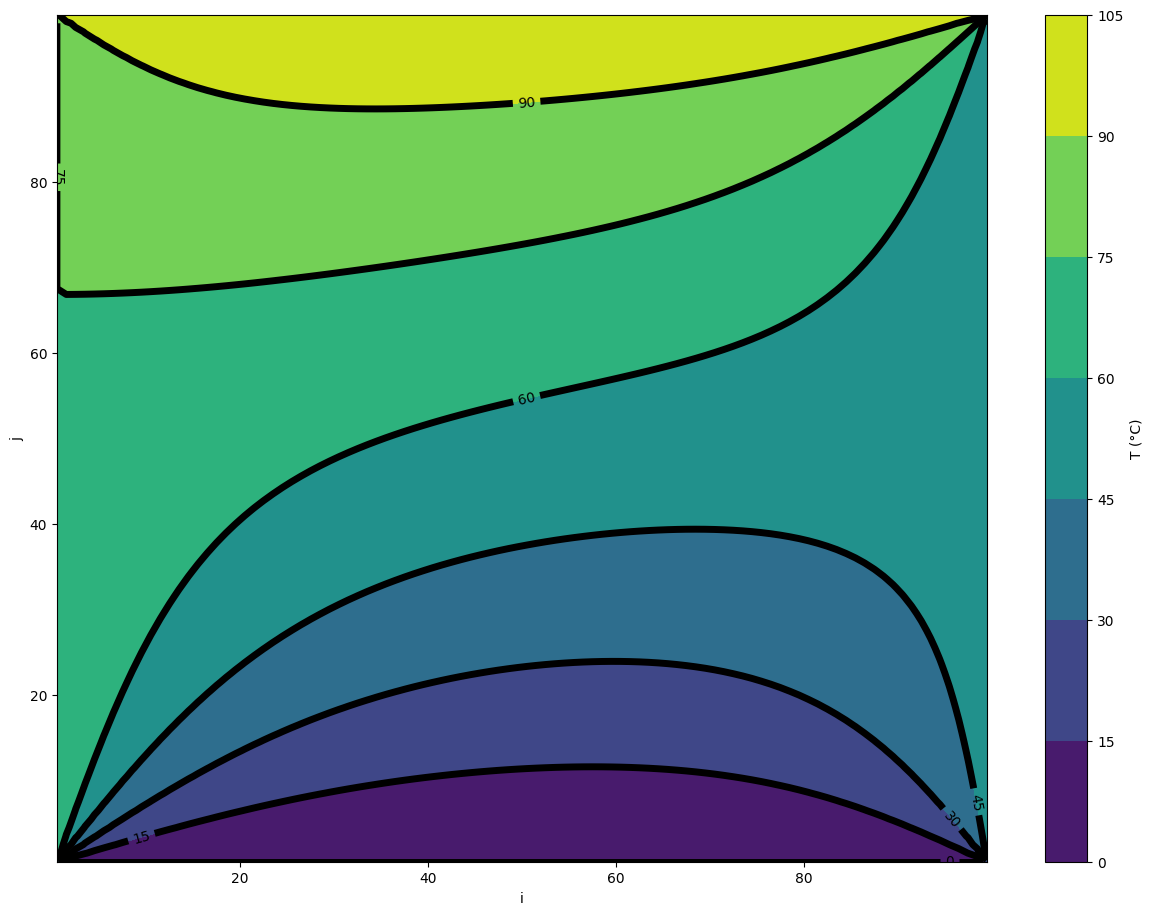

In [45]:
fig, ax = plt.subplots(figsize=(15,11))
mappable = ax.contourf(T.reshape(Nx,Ny), origin = 'upper')
levels = ax.contour(T.reshape(Nx,Ny),colors ='k',linewidths = 5, origin ='upper')
cbar = plt.colorbar(mappable)

cbar.set_label('T (°C)')
ax.clabel(levels, )
ax.set_xlabel('i')
ax.set_ylabel('j')